# NLP on South Carolina Food Reviews

The goal of this notebook is to do some rudimentary NLP on Reviews on South Carolina

In [57]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# NLP imports 
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer
from sklearn.feature_extraction import stop_words
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


/home/schubert/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [48]:
data = pd.read_csv("food_reviews_sc")

In [49]:
data.head()

,review_id,user_id,stars,date,text,useful,funny,cool,name,neighborhood,address,city,state,postal_code,latitude,longitude,review_count,is_open,categories,avg_stars
0,TgDVK5GGEVWqIQB1klOwOQ,Ow07iTOW_JUer07MWNhazg,5,2017-09-02,My husband and I happened to drive by BIG FOOD...,0,0,0,"""Small Bar Fort Mill""",NaN,"""3415 Hwy 51 N""",Fort Mill,SC,29715.0,35.086572,-80.931214,7.0,1.0,Restaurants;Bars;Pubs;Sports Bars;Nightlife,4.0
1,WsnsRDe7Ywl5FC7bALCBMA,nFS3GfDeOOzg-bXKuNNHsA,5,2017-08-01,First time great food and service will be goin...,0,0,0,"""Small Bar Fort Mill""",NaN,"""3415 Hwy 51 N""",Fort Mill,SC,29715.0,35.086572,-80.931214,7.0,1.0,Restaurants;Bars;Pubs;Sports Bars;Nightlife,4.0
2,8gkZ2V9YzsM9A3r6Lj9zrQ,M3ncFIlEfaSdSpoiMINwBA,4,2017-06-21,It's a bar. It's small. It's Small Bar! It's c...,1,1,1,"""Small Bar Fort Mill""",NaN,"""3415 Hwy 51 N""",Fort Mill,SC,29715.0,35.086572,-80.931214,7.0,1.0,Restaurants;Bars;Pubs;Sports Bars;Nightlife,4.0
3,UyD3TRVYYMCynpkBuR9CcQ,T81BRLNvCpRkgVtYyabImQ,4,2017-09-12,Great little bar in Fort Mill. We went for lun...,0,0,0,"""Small Bar Fort Mill""",NaN,"""3415 Hwy 51 N""",Fort Mill,SC,29715.0,35.086572,-80.931214,7.0,1.0,Restaurants;Bars;Pubs;Sports Bars;Nightlife,4.0
4,eAsxdJilerKbjmVd2FkDVQ,QKm7NuvVMmvWHKmW7blABg,5,2017-06-22,Small Bar is great! Super cold beer and the p...,0,0,1,"""Small Bar Fort Mill""",NaN,"""3415 Hwy 51 N""",Fort Mill,SC,29715.0,35.086572,-80.931214,7.0,1.0,Restaurants;Bars;Pubs;Sports Bars;Nightlife,4.0


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6808 entries, 0 to 6807
Data columns (total 20 columns):
review_id       6808 non-null object
user_id         6808 non-null object
stars           6808 non-null int64
date            6808 non-null object
text            6808 non-null object
useful          6808 non-null int64
funny           6808 non-null int64
cool            6808 non-null int64
name            6808 non-null object
neighborhood    4 non-null object
address         6808 non-null object
city            6808 non-null object
state           6808 non-null object
postal_code     6801 non-null float64
latitude        6808 non-null float64
longitude       6808 non-null float64
review_count    6808 non-null float64
is_open         6808 non-null float64
categories      6808 non-null object
avg_stars       6808 non-null float64
dtypes: float64(6), int64(4), object(10)
memory usage: 1.0+ MB


In [51]:
# dropping neighborhood since kind of useless 
X = data.drop("neighborhood", axis=1, inplace=True)
y = data["stars"]

## Recap viz

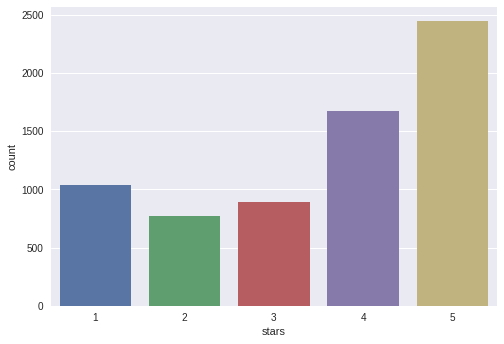

In [37]:
sns.set(style="darkgrid")
ax = sns.countplot(x="stars", data=data)

In [38]:
data["text"]

0       My husband and I happened to drive by BIG FOOD...
1       First time great food and service will be goin...
2       It's a bar. It's small. It's Small Bar! It's c...
3       Great little bar in Fort Mill. We went for lun...
4       Small Bar is great!  Super cold beer and the p...
5       I love this place, it just feels right. Excell...
6       Have gone to one in Stallings a few times and ...
7       Visited Los Aztecas for lunch today, just to t...
8       We moved to Fort Mill this past July.  This re...
9       Food is awesome been going here since high sch...
10      I live near this place and we probably eat the...
11      One of our favorite spots in Fort Mill.  Very ...
12      I always kept seeing this place on my driving ...
13      Love this place! There's also one in Tega Cay....
14      Best Mexican food in the Fort Mill\/Tega Cay a...
15      Fast service but food is kinda meh. I would sa...
16      Food came out in five minutes!  Prompt service...
17      The lu

## Stating with the Basics

In [52]:
# Train test split 
X_train, X_test, y_train, y_test = train_test_split(data["text"], y, test_size=0.30, random_state=42)

#### Bag of Words Model
Here, we will create a bag of words model to get a better sense of our data. What words are hot, whats not ext... 

In [55]:
X_train.head

<bound method NDFrame.head of 2589    Very different pulling up to a hotel and knowi...
3903    I have been to this location several times. Th...
782     Don't come here hungry. I couldn't tell you if...
6648    food service from kitchen was slow for a Monda...
927     I was very disappointed about our lunch at Swe...
5141    First time trying the place. Overall good expe...
3829    Meh... We came in pretty early; not quite noon...
5884    Flip Side is ok at best. It's a middle of the ...
1825    I frequently visit the uptown NC location so I...
1094    Always nice and friendly service when we dine ...
4763    Great local watering hole. Great staff of bart...
5696    I was in search of a pizza to measure up to Ia...
2588    Queso, 3 types of salsa, pico, and a bowl lime...
4119    I have mixed feelings on this place. It has a ...
4169    One star!  Let me begin by saying I've been co...
4450    There were no customers after my order. Waited...
1654    Excellent food, great service just

In [18]:
# instantiaing CountVectorizer 
cvec = CountVectorizer(stop_words='english') # should I be setting max_df

# making our corpus 
corpus = data["text"]

In [19]:
cvec.fit(corpus)

# tansforming corpus 
new_corpus = cvec.transform(corpus)

In [20]:
new_corpus

<6808x14375 sparse matrix of type '<class 'numpy.int64'>'
	with 252641 stored elements in Compressed Sparse Row format>

In [21]:
new_corpus.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [23]:
cvec.get_feature_names()

['00',
 '000',
 '0013',
 '00am',
 '00for',
 '00pm',
 '00s',
 '01',
 '01pm',
 '02',
 '02pm',
 '04',
 '05',
 '07',
 '071',
 '08',
 '09',
 '10',
 '100',
 '1000',
 '100s',
 '100x',
 '101',
 '1030',
 '1050',
 '106',
 '10am',
 '10in',
 '10min',
 '10minuets',
 '10p',
 '10pm',
 '10x',
 '11',
 '110',
 '1100',
 '1120',
 '11a',
 '11am',
 '11pm',
 '11x17',
 '12',
 '120',
 '1220pm',
 '1230pm',
 '124',
 '12n',
 '12noon',
 '12oz',
 '13',
 '135',
 '136',
 '14',
 '14pm',
 '15',
 '150',
 '15am',
 '15min',
 '15mins',
 '16',
 '160',
 '165',
 '16oz',
 '17',
 '18',
 '180',
 '18pm',
 '19',
 '1950',
 '1950s',
 '1970',
 '1975',
 '1980',
 '1987',
 '1994',
 '1995',
 '19th',
 '1am',
 '1burger',
 '1hr',
 '1pm',
 '1st',
 '1star',
 '1x',
 '20',
 '200',
 '2000',
 '2004',
 '2005',
 '2006',
 '2008',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2020',
 '20min',
 '20mins',
 '20oz',
 '20pm',
 '20th',
 '21',
 '2150',
 '21st',
 '22',
 '23',
 '24',
 '24a',
 '24k',
 '25',
 '250',
 '25mins',
 '26',

In [27]:
# X_train = pd.DataFrame(cvec.transform(data["text"]).todense(),
#                        columns=cvec.get_feature_names())

In [28]:
word_counts = X_train.sum(axis=0)
word_counts.sort_values(ascending = False).head(20)

food          5315
good          4458
place         3562
great         3299
service       2640
like          2194
just          2149
time          1998
order         1584
chicken       1578
ordered       1528
really        1478
restaurant    1457
got           1347
menu          1288
nice          1241
ve            1195
pizza         1195
best          1162
staff         1125
dtype: int64

In [29]:
y_train = data["stars"]

In [31]:
# closer look at the most common words